

adf = adfuller(df['Passengers'])
alpha = 0.05
if adf[1] <= alpha:
    print('Reject null hypothesis; The series doesn\'t have a unit root')
else:
    print('Failed to reject null hypothesis; The series has a unit root')


Augmented Dickey-Fuller Test (ADF Test)

$H_0$: The series has a unit root (non-stationary)

$H_1$: The series doesn't have a unit root (stationary)


import pmdarima as pmd

arima_model = pmd.auto_arima(
    df['Passengers'],
    max_d=2, start_p=0,
    start_q=0, trace=True,
    stationary=True
)


In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pmdarima as pmd
from statsmodels.tsa.stattools import adfuller


In [6]:
df = pd.read_csv(r'C:\Users\dheof\Desktop\AirPassengers.csv')
df

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121
...,...,...
139,8/1/1960,606
140,9/1/1960,508
141,10/1/1960,461
142,11/1/1960,390


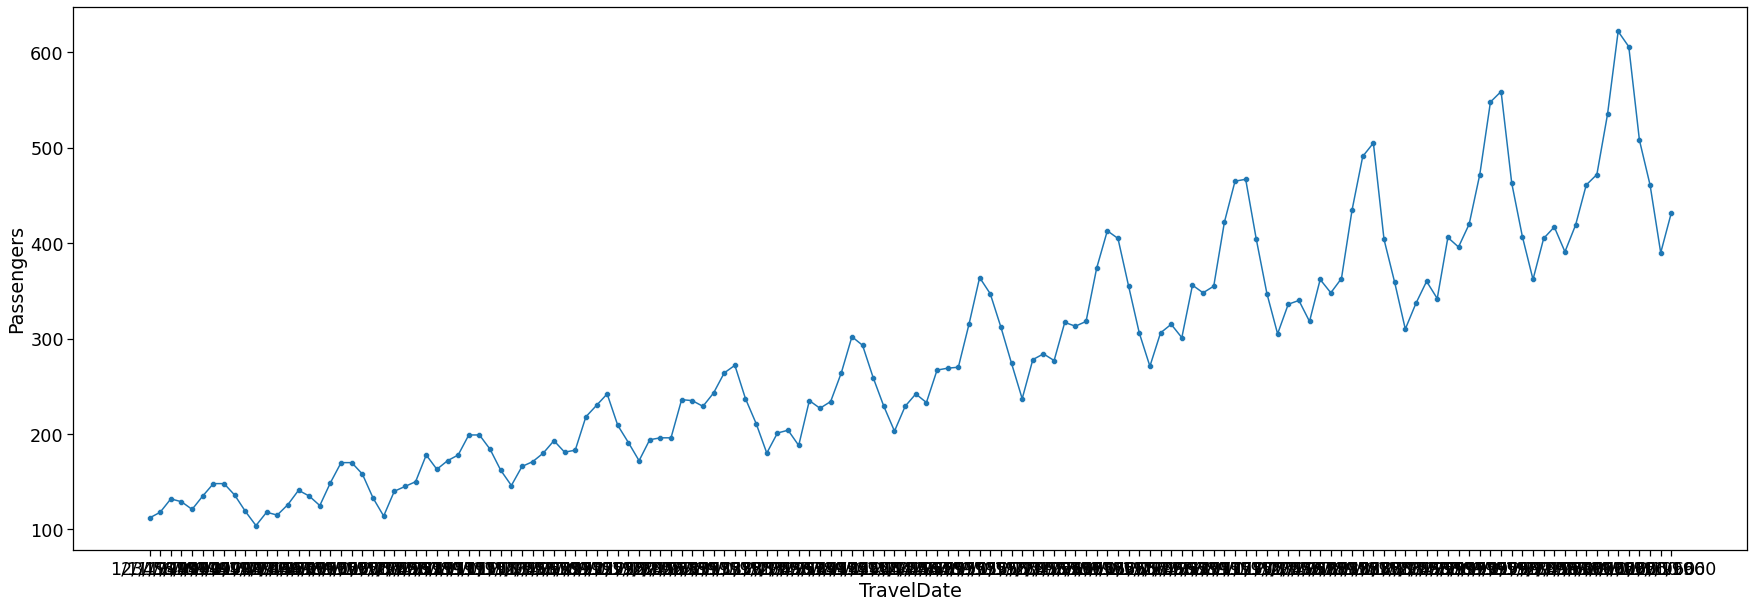

In [8]:
plt.figure(figsize = (30,10))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = 'TravelDate' , y = 'Passengers', data = df)
sns.lineplot(x = 'TravelDate', y = 'Passengers', data = df)

plt.show()

C:\Users\dheof\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


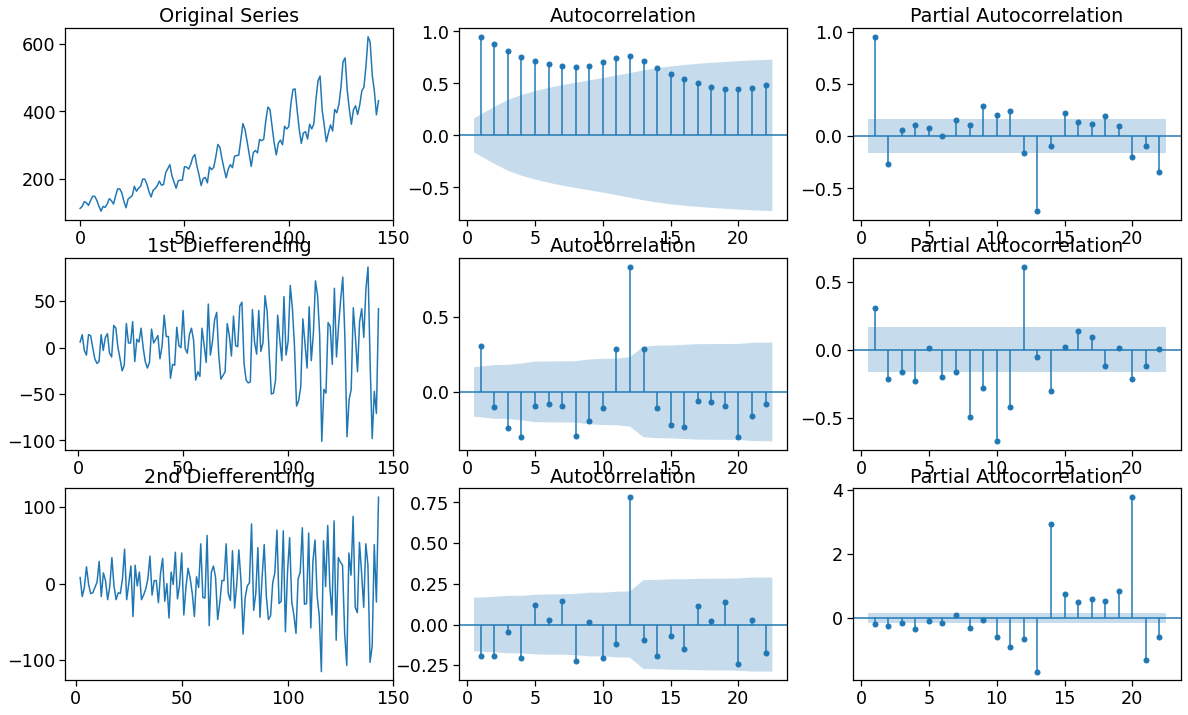

In [34]:
fig, axes = plt.subplots(3, 3, figsize = (20,12))
axes[0, 0].plot(df['Passengers']); axes[0, 0].set_title('Original Series')
plot_acf(df['Passengers'], ax=axes[0, 1], zero = False)
plot_pacf(df['Passengers'], ax=axes[0, 2], zero = False)


axes[1, 0].plot(df['Passengers'].diff()); axes[1, 0].set_title('1st Diefferencing')
plot_acf(df['Passengers'].diff().dropna(), ax=axes[1, 1], zero = False)
plot_pacf(df['Passengers'].diff().dropna(), ax=axes[1, 2], zero = False)


axes[2, 0].plot(df['Passengers'].diff().diff()); axes[2, 0].set_title('2nd Diefferencing')
plot_acf(df['Passengers'].diff().diff().dropna(), ax=axes[2, 1], zero = False)
plot_pacf(df['Passengers'].diff().diff().dropna(), ax=axes[2, 2], zero = False)

plt.show()

In [35]:
asd = df['Passengers'].diff().diff()
asd = asd.dropna()

$H_0$: The series has a unit root (non-stationary)

$H_1$: The series doesn't have a unit root (stationary)

In [36]:
adf = adfuller(asd)
alpha = 0.05
if adf[1] <= alpha:
    print('Reject null hypothesis; The series doesn\'t have a unit root')
else:
    print('Failed to reject null hypothesis; The series has a unit root')

Reject null hypothesis; The series doesn't have a unit root


## Model

1. ARIMA(2,2,0)
1. ARIMA(0,2,9)

In [39]:
model = ARIMA(df['Passengers'], order = (2,2,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D2.Passengers   No. Observations:                  142
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -717.039
Method:                       css-mle   S.D. of innovations             37.714
Date:                Thu, 14 Oct 2021   AIC                           1442.078
Time:                        14:43:44   BIC                           1453.901
Sample:                             2   HQIC                          1446.882
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0174      2.115      0.008      0.993      -4.128       4.162
ar.L1.D2.Passengers    -0.2494      0.083     -2.991      0.003      -0.413      -0.086
ar.L2.D2.Passeng

In [40]:
model2 = ARIMA(df['Passengers'], order = (0,2,9))
model2_fit = model2.fit()
print(model2_fit.summary())

C:\Users\dheof\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dheof\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

                             ARIMA Model Results                              
Dep. Variable:          D2.Passengers   No. Observations:                  142
Model:                 ARIMA(0, 2, 9)   Log Likelihood                -660.496
Method:                       css-mle   S.D. of innovations             23.065
Date:                Thu, 14 Oct 2021   AIC                           1342.992
Time:                        14:45:09   BIC                           1375.506
Sample:                             2   HQIC                          1356.205
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0016      0.066      0.024      0.981      -0.127       0.130
ma.L1.D2.Passengers    -0.7061      0.073     -9.636      0.000      -0.850      -0.562
ma.L2.D2.Passeng

## Forecasting

In [61]:
forecast_length = 12
forecast_result = model2_fit.forecast(forecast_length)

In [62]:
forecast_result

(array([425.45153269, 371.47122366, 337.27319095, 354.8603465 ,
        401.6210919 , 424.24548792, 501.01088545, 482.56771997,
        481.06390229, 479.56165337, 478.06097322, 476.56186182]),
 array([23.06494556, 37.7180261 , 47.8209611 , 51.28429239, 54.99848214,
        62.58794924, 70.3748483 , 74.53540642, 74.60021991, 74.69672965,
        74.83111759, 75.00946974]),
 array([[380.24507008, 470.6579953 ],
        [297.54525094, 445.39719639],
        [243.54582947, 431.00055242],
        [254.34498043, 455.37571256],
        [293.8260477 , 509.4161361 ],
        [301.57536154, 546.9156143 ],
        [363.07871735, 638.94305354],
        [336.48100782, 628.65443211],
        [334.85015803, 627.27764655],
        [333.1587535 , 625.96455325],
        [331.39467781, 624.72726862],
        [329.54600263, 623.57772101]]))

In [63]:
print('Forecasted Value',forecast_result[0], '\n')
print('Forecasted SE', forecast_result[1], '\n')
print('Forecasted confidence interval',forecast_result[2])


Forecasted Value [425.45153269 371.47122366 337.27319095 354.8603465  401.6210919
 424.24548792 501.01088545 482.56771997 481.06390229 479.56165337
 478.06097322 476.56186182] 

Forecasted SE [23.06494556 37.7180261  47.8209611  51.28429239 54.99848214 62.58794924
 70.3748483  74.53540642 74.60021991 74.69672965 74.83111759 75.00946974] 

Forecasted confidence interval [[380.24507008 470.6579953 ]
 [297.54525094 445.39719639]
 [243.54582947 431.00055242]
 [254.34498043 455.37571256]
 [293.8260477  509.4161361 ]
 [301.57536154 546.9156143 ]
 [363.07871735 638.94305354]
 [336.48100782 628.65443211]
 [334.85015803 627.27764655]
 [333.1587535  625.96455325]
 [331.39467781 624.72726862]
 [329.54600263 623.57772101]]


In [69]:
df.tail(13)

,TravelDate,Passengers
131,12/1/1959,405
132,1/1/1960,417
133,2/1/1960,391
134,3/1/1960,419
135,4/1/1960,461
136,5/1/1960,472
137,6/1/1960,535
138,7/1/1960,622
139,8/1/1960,606
140,9/1/1960,508


In [70]:
month = []
forecast_length = 12

for i in range(1, forecast_length + 1):
    month.append(str(i)+'/1/1961')

In [71]:
df_passengers_forecast = pd.DataFrame({
    'TravelDate' : month,
    'Passengers' : forecast_result[0]
})

In [72]:
df_passengers_forecast['SE'] = forecast_result[1]
df_passengers_forecast['Lower Bound'] = forecast_result[2][:,0]
df_passengers_forecast['Upper Bound'] = forecast_result[2][:,1]
df_passengers_forecast

,TravelDate,Passengers,SE,Lower Bound,Upper Bound
0,1/1/1961,425.451533,23.064946,380.245070,470.657995
1,2/1/1961,371.471224,37.718026,297.545251,445.397196
2,3/1/1961,337.273191,47.820961,243.545829,431.000552
3,4/1/1961,354.860346,51.284292,254.344980,455.375713
4,5/1/1961,401.621092,54.998482,293.826048,509.416136
5,6/1/1961,424.245488,62.587949,301.575362,546.915614
6,7/1/1961,501.010885,70.374848,363.078717,638.943054
7,8/1/1961,482.567720,74.535406,336.481008,628.654432
8,9/1/1961,481.063902,74.600220,334.850158,627.277647
9,10/1/1961,479.561653,74.696730,333.158753,625.964553


In [77]:
df_passengers_forecast.iloc[:12,:][['TravelDate', 'Passengers']]

,TravelDate,Passengers
0,1/1/1961,425.451533
1,2/1/1961,371.471224
2,3/1/1961,337.273191
3,4/1/1961,354.860346
4,5/1/1961,401.621092
5,6/1/1961,424.245488
6,7/1/1961,501.010885
7,8/1/1961,482.567720
8,9/1/1961,481.063902
9,10/1/1961,479.561653


In [87]:
df_passengers_forecast.iloc[:12,:][['TravelDate', 'Passengers']]

,TravelDate,Passengers
0,1/1/1961,425.451533
1,2/1/1961,371.471224
2,3/1/1961,337.273191
3,4/1/1961,354.860346
4,5/1/1961,401.621092
5,6/1/1961,424.245488
6,7/1/1961,501.010885
7,8/1/1961,482.567720
8,9/1/1961,481.063902
9,10/1/1961,479.561653


In [88]:
df = df.append(df_passengers_forecast.iloc[:12,:][['TravelDate', 'Passengers']])
df.tail(24)

,TravelDate,Passengers
132,1/1/1960,417.000000
133,2/1/1960,391.000000
134,3/1/1960,419.000000
135,4/1/1960,461.000000
136,5/1/1960,472.000000
137,6/1/1960,535.000000
138,7/1/1960,622.000000
139,8/1/1960,606.000000
140,9/1/1960,508.000000
141,10/1/1960,461.000000


In [89]:
fig = go.Figure([go.Scatter(name = 'Real', x = df['TravelDate'], y = df['Passengers'])])
fig.add_trace(go.Scatter(name = 'Forecast', x = df_passengers_forecast['TravelDate'], y= df_passengers_forecast['Passengers']))
fig.add_trace(go.Scatter(name = 'Lower Bound', x = df_passengers_forecast['TravelDate'], y= df_passengers_forecast['Lower Bound']))
fig.add_trace(go.Scatter(name = 'Upper Bound', x = df_passengers_forecast['TravelDate'], y= df_passengers_forecast['Upper Bound']))

fig.update_xaxes(rangeslider_visible = True)
fig.show()